In [289]:
import pandas as pd
import numpy as np

d = {
    "X1":[0., 3., 1.,3.,-6., -1., -1., 1.],
    "X2":[1., 3., 2., 5., -8., -2., -2., 2.],
    "Y": [0., 0., 0., 1., 1., 1., 1., 1.]
}

df = pd.DataFrame(d)
df

,X1,X2,Y
0,0.0,1.0,0.0
1,3.0,3.0,0.0
2,1.0,2.0,0.0
3,3.0,5.0,1.0
4,-6.0,-8.0,1.0
5,-1.0,-2.0,1.0
6,-1.0,-2.0,1.0
7,1.0,2.0,1.0


### 1. On souhaite appliquer la m´ethode des k plus proche voisins avec k = 1 directement sur les observations. En expliquant soigneusement toutes les ´etapes, prédire la classe du nouvel individu.

Le principe du modèle K-plus proche consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.   

On peut voir l'image de X1, X2 et Y, quand Y = 0, le point est rouge, quand Y = 1 le point est noir, le point vert c'est celui qu'il faut predire. Avec la méthode K-plus proche, on calcule la distance entre le points vert(0.0, -1.0) avec les autres K points qui sont plus proches.  Dans l'image, si on utilise 1-NN on va avoir le résultat le point vert = 1.0, parce que le point 5 est le point plus proche du point vert par rapport au point 0.

$d_08$ = $\sqrt{(X_2 - X_1)^2+(Y_2 - Y_1)^2}$ = $\sqrt{0 + 4}$ = 2

$d_58$ = $\sqrt{1 + 1}$ = $\sqrt{2}$ 

In [290]:
import math
def getDistance(point1, point2):
    dist = math.sqrt((point2[0][0] - point1[0][0])**2 + (point2[0][1] - point1[0][1])**2)  
    return dist  

print(getDistance([[0.,1.]], [[0., -1.]]))
print(getDistance([[-1.,-2]], [[0., -1.]]))

2.0
1.4142135623730951


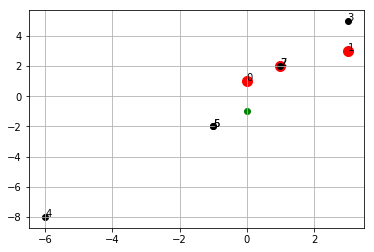

In [272]:
import matplotlib.pyplot as plt
#df.loc[-1] = [0., -1., None]
Y = df['Y']
for index,i in enumerate(Y):
    if i == 0.0:
        plt.scatter(df['X1'][index],d['X2'][index],color='red', s = 100, label='Y=0')
        plt.annotate(index, (df['X1'][index],d['X2'][index]))
    elif i == 1.0:
        plt.scatter(df['X1'][index],d['X2'][index],color='black', label='Y=1')
        plt.annotate(index, (df['X1'][index],d['X2'][index]))
plt.scatter(0.,-1.,color='green')
plt.grid()
plt.show()

In [291]:
from sklearn import neighbors
res = []
for i in range(1, 8):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(df[['X1', 'X2']], df['Y'])
    res.append(knn.predict([[0., -1.]]))
print(res)

[array([ 1.]), array([ 1.]), array([ 1.]), array([ 1.]), array([ 1.]), array([ 0.]), array([ 1.])]


In [292]:
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
score = []
train_target = df['Y']
train_features = df.drop('Y', axis=1)
eval_features, test_eval_features, eval_target, test_eval_target = \
cross_validation.train_test_split(train_features, train_target, test_size=0.33)

Knn quality is : 58.7719298246% with k = 1
Knn quality is : 65.7894736842% with k = 2
Knn quality is : 64.9122807018% with k = 3
Knn quality is : 67.1052631579% with k = 4
Knn quality is : 68.4210526316% with k = 5
Knn quality is : 69.298245614% with k = 6
Knn quality is : 67.9824561404% with k = 7


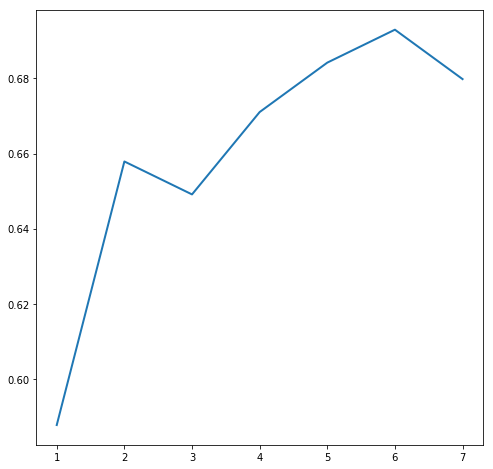

In [108]:
# Regardont la qualité de prédiction en utilisant la méthode validation croisée
for i in range(1, 8):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(eval_features, eval_target)
    resEval = knn.predict(test_eval_features)
    quality = accuracy_score(test_eval_target, resEval)
    score.append(quality)
    print("Knn quality is : " + str(quality*100) + "%" + " with k = " + str(i))

plt.figure(figsize=(8,8))
plt.plot(range(1, 8),score,linewidth=2)
plt.show()

Selon le résultat, on voit que Y8 est classifié en 1.0 sauf quand k = 6. Parce que quand k = 6, le nombres des points noirs plus proches est équal à 3, qui est identique avec le nombre des points rouges. Mais le mean de distance minimale entre les points classifiés et le point vert est la classe rouge.

D'après l'analyse de validation croisée, on voit que quand K = 6 la qualité de prédiction est meilleure 69%, et dans le modèle, pour prédire le nouveau point, il est classé dans Y=1 partout sauf quand K = 6, il est classé en Y=0, mais c'est la qualité meilleure en fonction de K et les datasets splité, que peut on choisir? 

### 2. On se rend compte que les co-variables X1 et X2 n’ont pas tout a fait la même dispersion.    

    2.1. Calculer la variance de chacune des variables X1 et X2.
    
    

In [74]:
# 2.1 
def getVariance(series):
    avg = sum(series)/len(series)
    var = sum((i - avg)**2 for i in series)/len(series)
    return var

var1 = getVariance(df['X1'])
var2 = getVariance(df['X2'])
print(var1)
print(var2)

7.25
14.359375


2.2. Expliquer soigneusement pourquoi cela peut être problèmatique pour la méthode de classification des k plus proches voisins.
 
Cette méthode n'est pas pertinente car le résultat est dépend de K, si K n'est pas bien choisi, le résultat peut être faut.    

Dans 2.1, on voit que la variance X2 est plus grande que X1, c'est-à-dire que X2 influence plus le résultat.Le problème c'est que tout les points se considère un même weight. Donc elle est très sensible aux données qui sont proches du nouveau point à prédire si K est petit, si ces données proches sont les bruits, le résultat serait possible incorrecte, un modèle sur-apprentissage . Si K est grand, 

2.3. Comment remédier à ce problème ? (indication : changer la distance)

Il existe un algorithme améliorant par KNN s'appelle Large margin nearest neighbor LMNN. Cette méthode permet de créer un cercle à partir du point p avec un rayon. Ce rayon est définit par calculer la distances des k voisins pour tous les points dans l'exemplaire.    

Posons nous une amélioration qui s'agit comparer le similitude du vecteur, c'est à  dire, on compare l'angle cosinus entre le point à predire et les autres points. Dans le schémas, tous les points de Y=1 sont prèsque dans une ligne droite. Quand K = 1, on prend un point voisin Y=1 p5 et un point voisin Y=0 p0, et on compare l'angle entre p5 et le point vert, l'angle entre p0 et le point vert, on choisit le résultat plus grand, parce que plus le résultat est grand, plus leur angle est petit, plus ils sont similaires. 

$cos(\theta)$=$\frac{x_1x_2+y_1y_2}{\sqrt{x_1^2+y_2^2}\sqrt{x_2^2+y_2^2}}$ = $\frac{AB}{|A||B|}$

2.4. Predire la classe du nouvel individu avec cette nouvelle méthode en prenant k = 1.
Dans 2.4, j'ai utilisé cette méthode pour classifier le point p, il est classé en Y=1, mais la qualité est juste 54%. Elle ne convient pas ces données de petite taille. 

Quand on utilise la distance cosinus à calculer la similitude, le point p0 est bien plus similaire que le point p5. 


In [126]:
from metric_learn import LMNN
lmnn = LMNN(k=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
lmnn.fit(df[['X1', 'X2']], df['Y'])
knn.fit(lmnn.transform(df[['X1', 'X2']]), df['Y'])
print(knn.predict(lmnn.transform([[0., -1.]])))

lmnn.fit(eval_features, eval_target)
knn.fit(lmnn.transform(eval_features), eval_target)
resEval = knn.predict(lmnn.transform(test_eval_features))
quality = accuracy_score(test_eval_target, resEval)
print(quality)

/home/teasyu/anaconda3/lib/python3.6/site-packages/metric_learn/lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


[ 1.]
0.587719298246


In [310]:
# Calculer l'angle cosinus
df.loc[-1] = [0., -1., None]
def cosin_distance(vector1, vector2):
    dot_product = 0.0
    normA = 0.0
    normB = 0.0
    for a, b in zip(vector1, vector2):
        dot_product += a * b
        normA += a ** 2
        normB += b ** 2
    if normA == 0.0 or normB == 0.0:
        return None
    else:
        return abs(dot_product / ((normA * normB) ** 0.5))

angle80 = cosin_distance(df[['X1', 'X2']].loc[0], df[['X1', 'X2']].loc[-1])
angle85 = cosin_distance(df[['X1', 'X2']].loc[5], df[['X1', 'X2']].loc[-1])
print(angle85, angle80)

0.894427191 1.0


### Exercice 2. Pour les données australian_credit vous proposerez (en motivant votre choix) puis mettrez en œuvre une méthode de classification supervisée. Vous prendrez soin d’expliquer les différentes étapes de calibration et d’évaluation de la qualité de la méthode choisie.

In [192]:
import pandas as pd
import numpy as np

df = pd.read_csv("australian_credit.csv")
train_target = df['Y']
train_features = df.drop('Y', axis=1)
eval_features, test_eval_features, eval_target, test_eval_target = \
cross_validation.train_test_split(train_features, train_target, test_size=0.33)
print(df.loc[df['Y']==1].shape)
df.head(10)

(307, 15)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Y
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


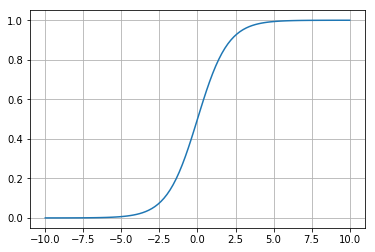

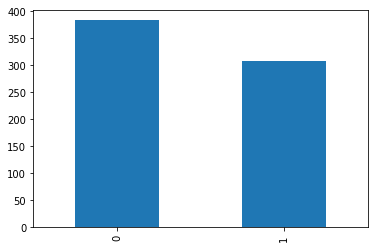

Proportion
0    0.555072
1    0.444928
Name: Y, dtype: float64


In [268]:
# Sigmoid function feature

x = np.linspace(-10, 10, 101)
y = 1/(1+np.exp(-x))
plt.plot(x, y)
plt.grid()
plt.show()
count_classes = pd.value_counts(df['Y'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.show()
print("Proportion")
print(pd.value_counts(df['Y'])/df.shape[0])

### Regression logistics 

**Définition**  
La régression logistique ou modèle logit est un modèle de régression binomiale.   
Après développer la fonction sigmoïd on peut trouver un nouveau model:
    $h_x(\theta)$ = $\frac{1}{1+e^{-\theta^Tx}}$    
Ici, $h_x(\theta)$ représente la possibilité de résultat = 1. 
Ensuite, on établit la fonction de loss $J(\theta)$ par calculer $\log{h_x(\theta)}$ quand y=1 et $\log{(1 - h_x(\theta))}$ quand y = 0. On peut retrouver $\theta$ par la méthode de vraisemblance maximale.
La régression logistique est largement répandue dans de domaines médicines.
Dans le modèle dessous, on entraîne les données et calcule la qualité de ce modèle est 78%, qui est plutôt inutile. 

**Calibration**
Dans le schémas au dessus, on voit que le nombre de Y = 0 et Y = 1 est à peu près égal, il n'est pas nécessaire à ajuster.
1. On voit que V13 et V14 sont souvent très grandes par rapport au autres données, on peut changer ces colonnes en une suite de données qui a l'espérance 0 et la variance 1. Le résultat augmente de 75.8% à 83.3%.

2. Même si on a ajusté les données, le résultat 83.3% n'est pas significatif. On continue a chercher une amélioration. 
Regardont la définition de la fonction LogisticRegression: 

*class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)*

- Nous avons juste six centaines données, c'est une petite taille. Considérant à changer *penalty* à 'l1'
- L'argument C est important pour ajuster le résultat mais aussi faut éviter sur-apprentissage, c'est 'Inverse of regularization strength; must be a positive float'. Mais le moment, je ne sais pas comment choisir C. Pour définir C, on peut construire une matrice de confusion en choisissant des C values différentes.

3. Selon la table de C, on voit que le meilleur choix est 2 qui peut atteindre 91%, et dans la matrice de confusion, on a un ratio sensitive 87.8%.

In [178]:
from sklearn.linear_model import LogisticRegression
# Origin data
def lrregression(eval_features, eval_target, test_eval_features, test_eval_target):
    modelLR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
    modelLR.fit(eval_features, eval_target)
    resLREval = modelLR.predict(test_eval_features)
    scoreLR = accuracy_score(test_eval_target, resLREval)
    print("Logistic regression quality is " + str(scoreLR*100) + "%")

lrregression(eval_features, eval_target, test_eval_features, test_eval_target)

Logistic regression quality is 75.8771929825%


In [179]:
from sklearn.preprocessing import StandardScaler
# Calibration
eval_features['V13']=StandardScaler().fit_transform(eval_features['V13'].values.reshape([-1,1]))
test_eval_features['V13'] = StandardScaler().fit_transform(test_eval_features['V13'].values.reshape([-1,1]))
eval_features['V14']=StandardScaler().fit_transform(eval_features['V14'].values.reshape([-1,1]))
test_eval_features['V14'] = StandardScaler().fit_transform(test_eval_features['V14'].values.reshape([-1,1]))
eval_features.head(10)

/home/teasyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/teasyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/teasyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
365,0,50.25,0.835,2,6,4,0.500,0,0,0,1,2,0.367470,-0.171859
634,1,18.58,10.290,2,1,1,0.415,0,0,0,0,2,-0.656365,-0.193801
250,1,24.08,9.000,2,6,4,0.250,0,0,0,1,2,-1.168283,-0.193801
163,1,34.50,4.040,1,3,5,8.500,1,1,7,1,2,0.079516,-0.193801
394,0,25.58,0.000,2,8,4,0.000,0,0,0,0,3,0.009128,-0.193801
352,1,31.57,4.000,2,14,4,5.000,1,1,3,1,2,0.687418,0.233594
205,1,30.83,0.000,2,9,4,1.250,1,1,1,0,2,0.124309,-0.193801
153,1,18.83,0.415,1,8,4,0.165,0,1,1,0,2,0.111511,-0.193613
238,1,35.58,0.750,2,4,4,1.500,0,0,0,1,2,0.309879,-0.193801
620,1,26.92,2.250,2,3,5,0.500,0,0,0,1,2,2.927058,0.556343


In [180]:
# Etablir le modèle par les données corrigées
lrregression(eval_features, eval_target, test_eval_features, test_eval_target)

Logistic regression quality is 83.3333333333%


In [266]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

def printing_Kfold_scores(x_train_data,y_train_data):

    fold = KFold(len(y_train_data),3,shuffle=False)

    c_param_range = [0.1,0.5,0.7,0.8,0.9,1,2]  

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    j = 0

    for c_param in c_param_range:  
        y_accs = []
        for iteration, indices in enumerate(fold,start=1): 
            # Validation croiséé et penalty est égal à l1
            lr = LogisticRegression(C = c_param, penalty = 'l1', solver='liblinear') 
            #print(y_train_data.iloc[indices[0]])
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0]].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            # Calculer la ratio de recall
            y_acc = recall_score(y_train_data.iloc[indices[1]].values,y_pred_undersample)
            y_accs.append(y_acc)
            
        # Calculer la moyenne de recall score
        results_table.loc[j,'Mean recall score'] = np.mean(y_accs)
        j += 1

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print(results_table)
    return best_c
 
best_c = printing_Kfold_scores(eval_features,eval_target)
print(best_c)

   C_parameter Mean recall score
0          0.1          0.869926
1          0.5          0.902903
2          0.7          0.898072
3          0.8          0.902903
4          0.9          0.898072
5          1.0          0.907734
6          2.0            0.9123
2.0


Recall metric in the testing dataset:  0.878787878788
C is taken :  2.0


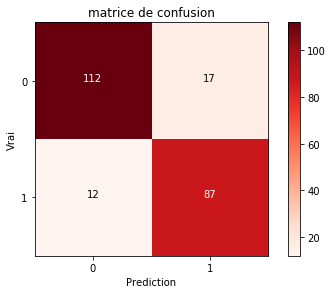

In [267]:
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vrai')
    plt.xlabel('Prediction')


lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(eval_features, eval_target.values.ravel())
y_pred_undersample = lr.predict(test_eval_features.values)
# Calculer la matrice de confusion
cnf_matrix = confusion_matrix(test_eval_target,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("C is taken : ", best_c)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='matrice de confusion')
plt.show()